<a href="https://colab.research.google.com/github/saturnsz/DETEKSI-DAN-PENGHITUNGAN-OBJEK-OTOMATIS-TELUR-MENGGUNAKAN-OPENCV/blob/main/percobaan1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

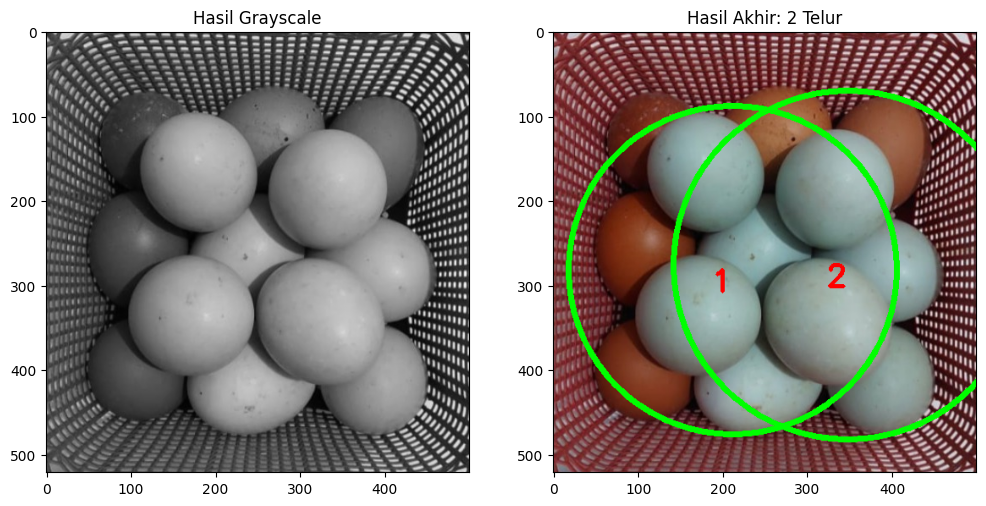

Jumlah telur terdeteksi secara otomatis: 2


In [ ]:
img = cv2.imread('/content/drive/MyDrive/telurr.jpeg') # Pastikan file sudah di-upload ke Colab
if img is None:
    print("Gambar tidak ditemukan! Pastikan file 'telur.jpg' sudah diupload.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # --- LANGKAH KUNCI: CROP AREA ---
    # Memotong pinggiran gambar agar lantai tidak ikut terhitung
    h, w, _ = img.shape
    img_focus = img[int(h*0.15):int(h*0.85), int(w*0.15):int(w*0.85)]
    img_focus_rgb = cv2.cvtColor(img_focus, cv2.COLOR_BGR2RGB)

    # 2. GRAYSHAE (Langkah 2) [cite: 34]
    gray = cv2.cvtColor(img_focus, cv2.COLOR_BGR2GRAY)

    # 3. GAUSSIAN BLUR (Langkah 3)
    # Menghilangkan noise tekstur keranjang agar tidak dianggap telur
    blur = cv2.GaussianBlur(gray, (35, 35), 0)

    # 4. THRESHOLDING OTSU (Langkah 4)
    # Mengubah grayscale menjadi biner (hitam putih)
    ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Operasi Morfologi untuk membersihkan noise kecil [cite: 61]
    kernel = np.ones((5,5), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # 5. DETEKSI & HITUN KONTUR (Langkah 5: Distance Transform)
    # Memisahkan telur yang saling menempel
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

    # Nilai 0.15 membuat sistem sangat sensitif mencari pusat setiap telur [cite: 67]
    ret, sure_fg = cv2.threshold(dist_transform, 0.15 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)

    # 6. SEGMAT & HITUN KONTUR (Langkah 6: Final) [cite: 75]
    cnts, _ = cv2.findContours(sure_fg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    hasil_final = img_focus_rgb.copy()
    count = 0

    for i, c in enumerate(cnts):
        # Filter luas area: mengabaikan objek yang terlalu kecil
        if cv2.contourArea(c) > 50:
            count += 1
            ((x, y), radius) = cv2.minEnclosingCircle(c)
            # Gambar lingkaran hijau (Langkah 6)
            cv2.circle(hasil_final, (int(x), int(y)), int(radius)+15, (0, 255, 0), 5)
            # Beri nomor merah
            cv2.putText(hasil_final, str(count), (int(x)-25, int(y)+25),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 0, 0), 3)

    # Tampilkan Hasil Grayscale dan Hasil Akhir
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1), plt.imshow(gray, cmap='gray'), plt.title('Hasil Grayscale')
    plt.subplot(1, 2, 2), plt.imshow(hasil_final), plt.title(f'Hasil Akhir: {count} Telur')
    plt.show()

    print(f"Jumlah telur terdeteksi secara otomatis: {count}")

In [ ]:
!pip install opencv-python-headless

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Upload gambar telur
uploaded = files.upload()

# Ambil nama file pertama
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)

Saving WhatsApp Image 2026-01-06 at 00.00.06.jpeg to WhatsApp Image 2026-01-06 at 00.00.06.jpeg


(np.float64(-0.5), np.float64(714.5), np.float64(743.5), np.float64(-0.5))

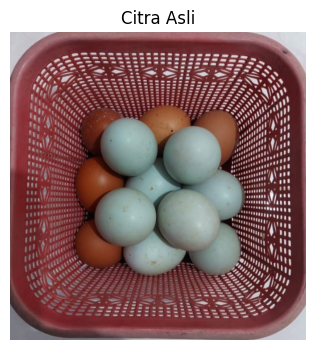

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Citra Asli")
plt.axis("off")

(np.float64(-0.5), np.float64(714.5), np.float64(743.5), np.float64(-0.5))

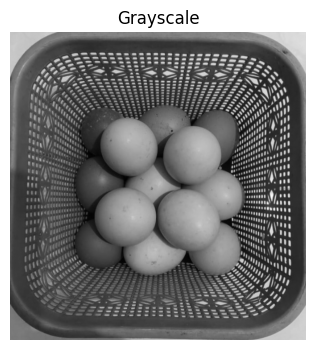

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(4,4))
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")

(np.float64(-0.5), np.float64(714.5), np.float64(743.5), np.float64(-0.5))

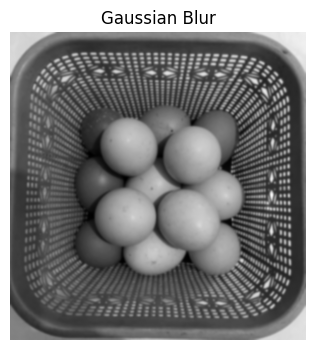

In [ ]:
blur = cv2.GaussianBlur(gray, (11,11), 0)

plt.figure(figsize=(4,4))
plt.imshow(blur, cmap='gray')
plt.title("Gaussian Blur")
plt.axis("off")

(np.float64(-0.5), np.float64(714.5), np.float64(743.5), np.float64(-0.5))

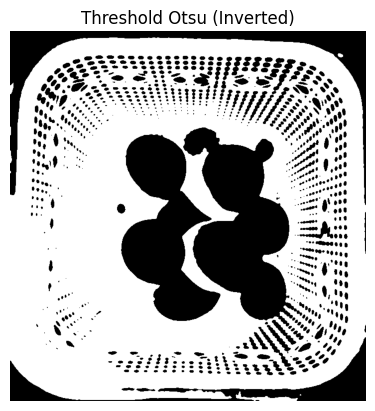

In [ ]:
_, thresh = cv2.threshold(
    blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
)

plt.imshow(thresh, cmap='gray')
plt.title("Threshold Otsu (Inverted)")
plt.axis("off")


(np.float64(-0.5), np.float64(714.5), np.float64(743.5), np.float64(-0.5))

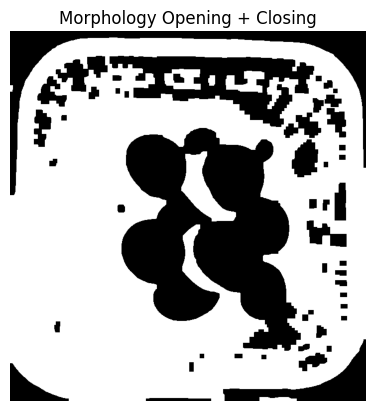

In [ ]:
kernel = np.ones((5,5), np.uint8)

opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)

plt.imshow(closing, cmap='gray')
plt.title("Morphology Opening + Closing")
plt.axis("off")

In [ ]:
contours, _ = cv2.findContours(
    closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

egg_contours = []
for c in contours:
    area = cv2.contourArea(c)
    if 1000 < area < 20000:   # filter noise & objek aneh
        egg_contours.append(c)

jumlah_telur = len(egg_contours)

Jumlah Telur: 0


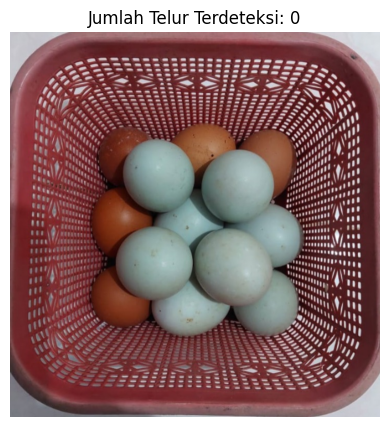

In [ ]:
output = img.copy()

for i, c in enumerate(egg_contours):
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(output, (x,y), (x+w,y+h), (0,255,0), 2)
    cv2.putText(output, f"Telur {i+1}", (x, y-5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title(f"Jumlah Telur Terdeteksi: {jumlah_telur}")
plt.axis("off")

print("Jumlah Telur:", jumlah_telur)


In [ ]:
print("Jumlah Telur yang Terdeteksi:", jumlah_telur)

Jumlah Telur yang Terdeteksi: 5


In [47]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

Jumlah Telur Terdeteksi: 3


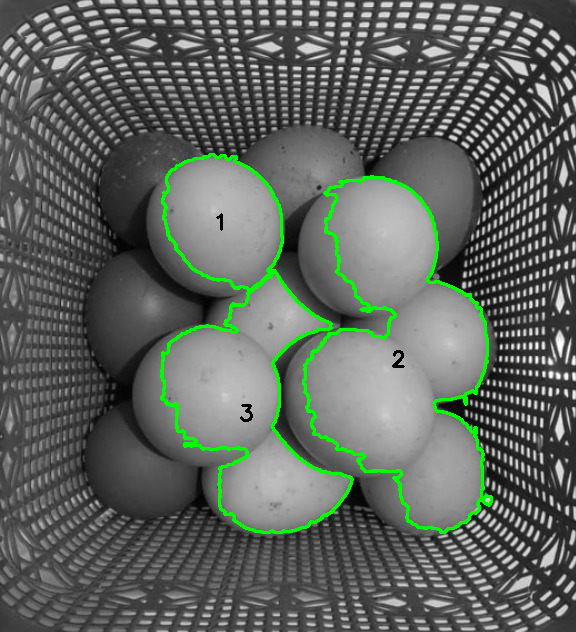

In [50]:
# 1. Load Gambar
img = cv2.imread('/content/drive/MyDrive/telur22.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Pre-processing Kuat
# Gabungan Blur untuk menghilangkan tekstur keranjang tapi menjaga tepi telur
blurred = cv2.bilateralFilter(gray, 9, 75, 75)

# 3. Thresholding Otomatis
ret, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 4. Memisahkan Telur yang Menempel (Distance Transform)
# Menghitung jarak ke pusat setiap telur
dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)

# Mengambil puncak jarak sebagai benih (marker) setiap telur
# Angka 0.35 ini sangat menentukan:
# Jika hasil < 13, turunkan ke 0.25. Jika hasil > 13, naikkan ke 0.45.
ret, sure_fg = cv2.threshold(dist_transform, 0.35 * dist_transform.max(), 255, 0)

# 5. Marker untuk Watershed
sure_fg = np.uint8(sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
unknown = cv2.subtract(cv2.dilate(thresh, np.ones((3,3), np.uint8), iterations=3), sure_fg)
markers[unknown == 255] = 0

# 6. Jalankan Watershed
markers = cv2.watershed(img, markers)

# 7. Visualisasi Persis Gambar Referensi (Grayscale Background + Green Contour)
# Kita buat background grayscale agar nomor dan kontur terlihat jelas
img_final = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
count = 0

for label in np.unique(markers):
    if label <= 1: # Abaikan background dan batas watershed
        continue

    # Membuat mask untuk setiap telur
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[markers == label] = 255

    # Temukan kontur dari mask
    cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if cnts:
        c = max(cnts, key=cv2.contourArea)
        # Filter luas agar lubang keranjang kecil tidak ikut terhitung
        if cv2.contourArea(c) > 1500:
            count += 1
            # Gambar Kontur Hijau (0, 255, 0)
            cv2.drawContours(img_final, [c], -1, (0, 255, 0), 2)

            # Taruh Nomor di Tengah
            M = cv2.moments(c)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                cv2.putText(img_final, str(count), (cX - 10, cY + 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)

# Tampilkan Hasil
print(f"Jumlah Telur Terdeteksi: {count}")
cv2_imshow(img_final)